# Target Decoding from Monkey Neural Data

This notebook demonstrates how to decode a monkey's representation of targets from neural data using multiple approaches:

1. **Canonical Correlation Analysis (CCA)** - Find correlations between neural activity and target representation
2. **Machine Learning Models** - Predict specific target properties from neural data
3. **Feature Importance Analysis** - Identify which neurons contribute most to target encoding

## Setup


In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

project_folder = '/Users/dusiyi/Documents/Multifirefly-Project'
os.chdir(project_folder)
sys.path.append(os.path.join(project_folder, 'multiff_analysis', 'methods'))


# Import packages
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set up paths
project_folder = '/Users/dusiyi/Documents/Multifirefly-Project'
os.chdir(project_folder)
sys.path.append(os.path.join(project_folder, 'multiff_analysis', 'methods'))
sys.path.append(os.path.join(project_folder, 'multiff_analysis'))

# Import our custom decoder
from target_decoder import TargetDecoder
from non_behavioral_analysis.neural_data_analysis.model_neural_data import transform_vars, neural_data_modeling, drop_high_corr_vars, drop_high_vif_vars
from machine_learning.ml_methods import regression_utils, classification_utils, prep_ml_data_utils
from non_behavioral_analysis.neural_data_analysis.decode_targets import prep_decode_target, behav_features_to_keep, eval_decode_target

print("Setup completed!")


Setup completed!


## 1. Initialize the Target Decoder

We'll use data from monkey Bruno as an example.


In [2]:
# Set data path
raw_data_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0328"

# Initialize decoder
print("Initializing target decoder...")
decoder = TargetDecoder(
    raw_data_folder_path=raw_data_path,
    bin_width=0.02,      # 20ms time bins
    window_width=0.05    # 50ms sliding window
)

print("Decoder initialized successfully!")


Initializing target decoder...
Decoder initialized successfully!


## 2. Load and Prepare Data

This step loads the neural data (spike counts) and behavioral data (target information).


In [3]:
# Load and prepare data
decoder.load_and_prepare_data(exists_ok=True, use_lags=False)

print(f"\nData Summary:")
print(f"Neural data shape: {decoder.neural_data.shape}")
print(f"Target data shape: {decoder.target_data.shape}")
print(f"Time points: {decoder.neural_data.shape[0]}")
print(f"Neurons: {decoder.neural_data.shape[1]}")
print(f"Behavioral features: {decoder.target_data.shape[1]}")


Preparing neural and behavioral data...
Loaded x_var from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_x_var.csv
Loaded y_var from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var.csv
Loaded y_var_reduced from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var_reduced.csv
Loaded x_var_lags and y_var_lags from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_x_var_lags.csv and all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var_lags.csv
Loaded y_var_lags_reduced from all_monkey_data/decoding_targets/monkey_Bruno/data_0328/decode_target_y_var_lags_reduced.csv
Retrieved target_df
Neural data shape: (33125, 22)
Behavioral data shape: (33125, 33)
Target features shape: (33125, 33)

Data Summary:
Neural data shape: (33125, 22)
Target data shape: (33125, 33)
Time points: 33125
Neurons: 22
Behavioral features: 33


## 3. Canonical Correlation Analysis (CCA)

CCA finds linear combinations of neural activity that are maximally correlated with linear combinations of target features.


Performing CCA-based decoding...
Performing CCA-based decoding...
Training CCA, kernel = None, regularization = 0.0000, 10 components
Canonical Correlation Per Component Pair: [0.38539 0.18021 0.15348 0.10463 0.09351 0.07062 0.06416 0.06216 0.05709
 0.05106]
% Shared Variance: [0.14853 0.03247 0.02356 0.01095 0.00874 0.00499 0.00412 0.00386 0.00326
 0.00261]


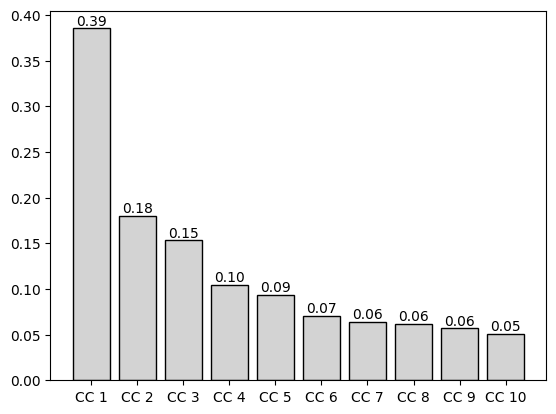

CCA completed. Top 3 canonical correlations: [0.38539 0.18021 0.15348]


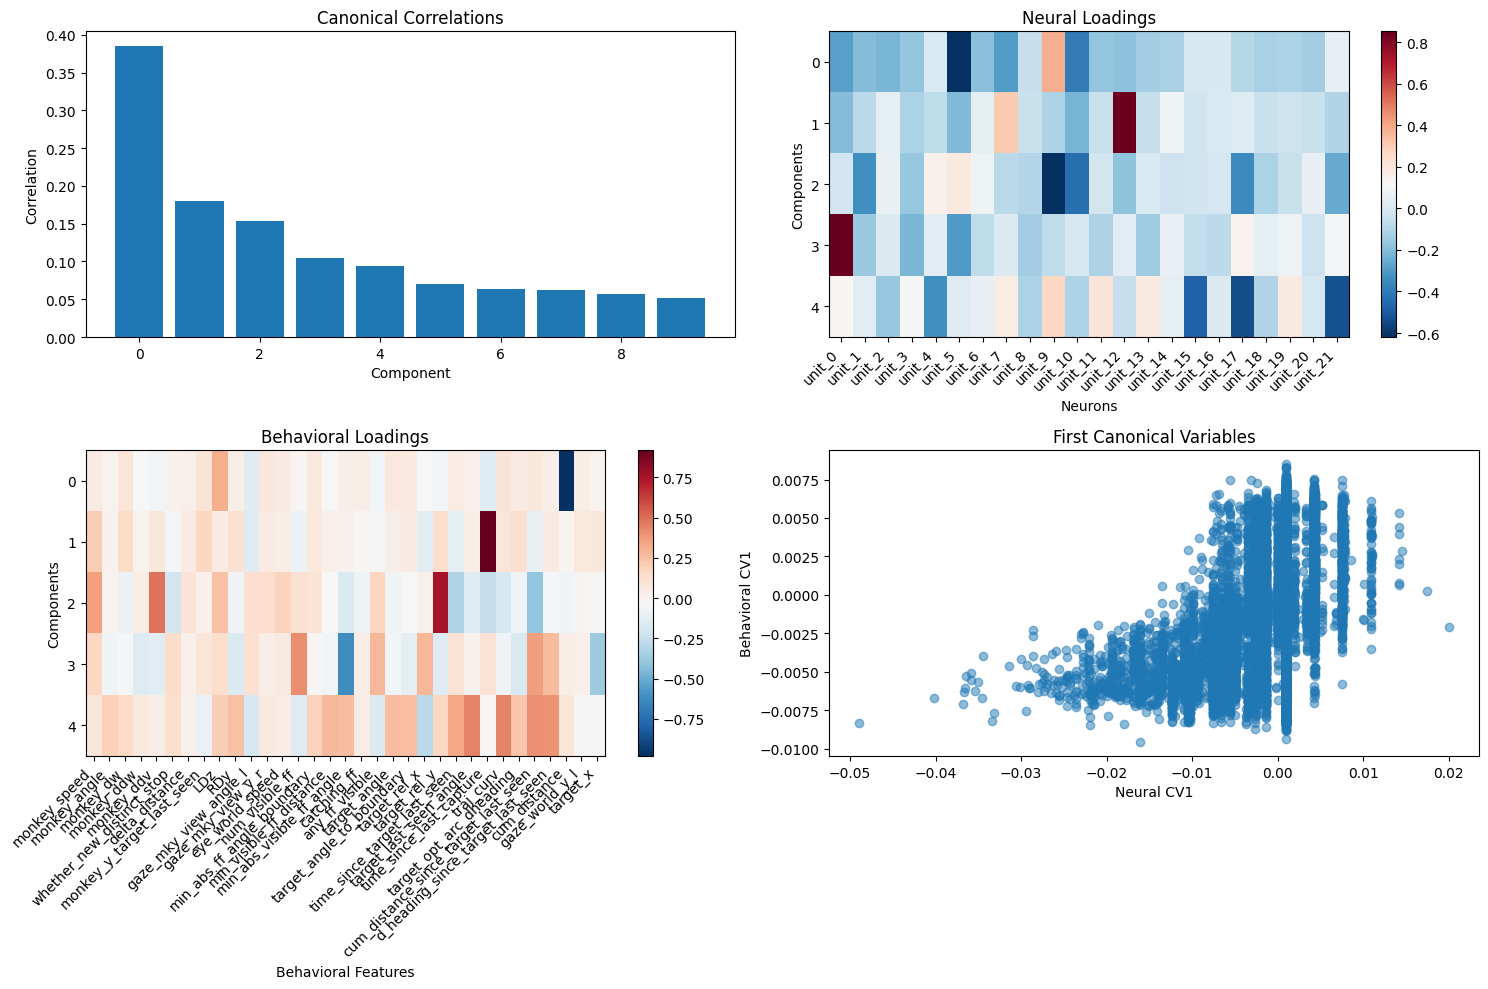

In [7]:
# Perform CCA-based decoding
print("Performing CCA-based decoding...")
cca_results = decoder.decode_with_cca(n_components=10)

# Plot CCA results
decoder.plot_cca_results(max_components=5)


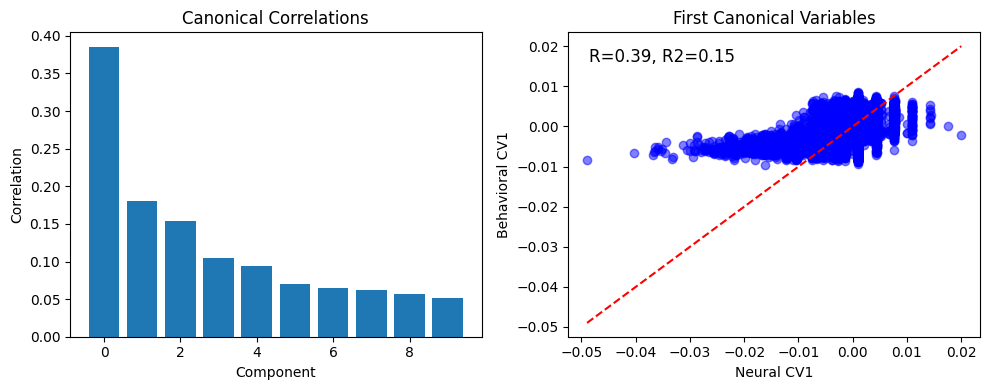

In [17]:
decoder.plot_cca_results()

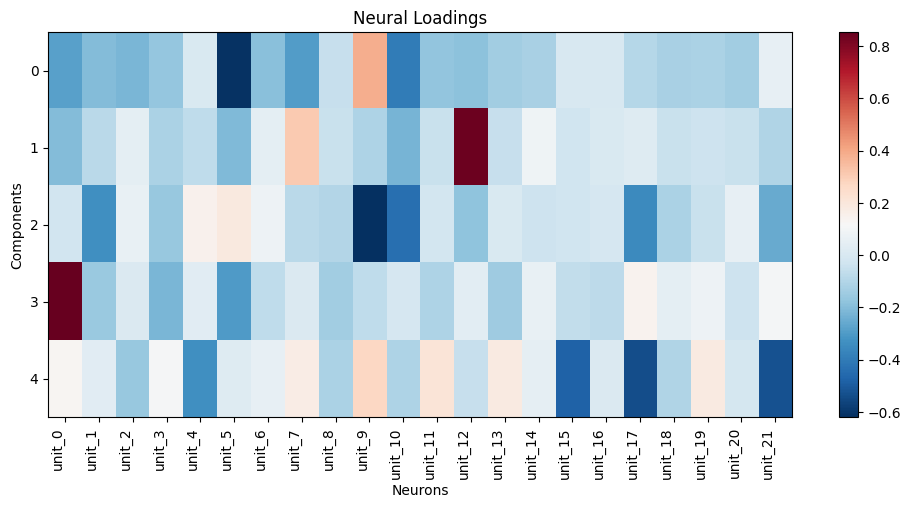

In [27]:
decoder.plot_neural_loadings()

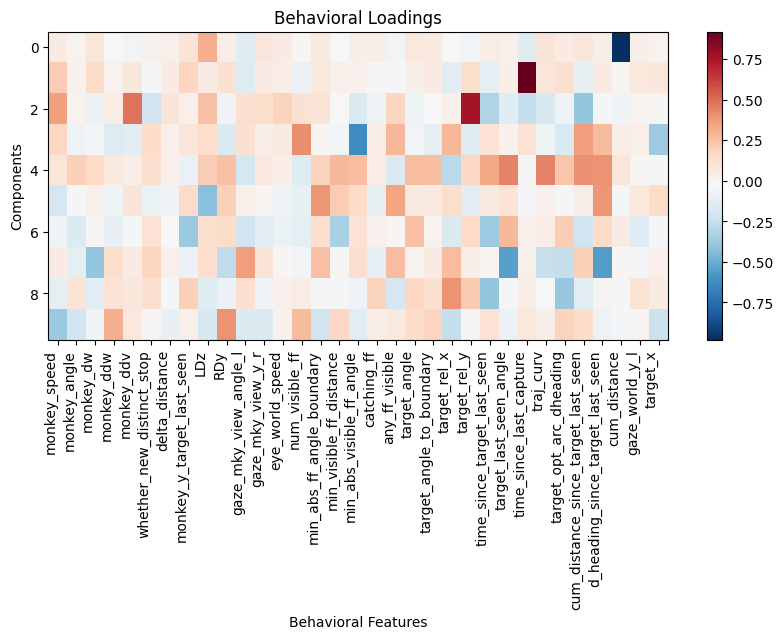

In [25]:
decoder.plot_behav_loadings()